In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import mysql.connector


username = 'root'
user_password = ''


cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='project'
)




In [277]:
import mysql.connector
import pandas as pd

username = 'root'
user_password = '@Mg89141379@'

cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='project'
)

# Create a cursor object to execute SQL statements
cursor = cnx.cursor()

# Execute a SQL query to get the names of all tables in the database
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'project'"
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Loop through the table names and create DataFrames for each table
dfs = {}
for row in results:
    table_name = row[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
    dfs[table_name] = df

# Close the cursor and the connection
cursor.close()
cnx.close()

# Access the DataFrames by table name
for table_name, df in dfs.items():
    print(f"Table Name: {table_name}")
   # print(df)
  #  print()


Table Name: clubs
Table Name: clubs_season
Table Name: competitions
Table Name: national
Table Name: players
Table Name: players_season
Table Name: seasons
Table Name: transfers


C:\Users\mehrs\AppData\Local\Temp\ipykernel_3596\2205597750.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)


In [278]:
dfs['clubs_season']

,id,club_id,season_id,competition_id,rank,matches,win,draw,loss,goals_scored,goals_conceded,players_avg_age
0,1,1,1,1,14,24,19,0,20,39,38,26
1,2,2,1,2,18,24,11,7,13,14,17,27
2,3,3,1,3,1,24,6,9,2,31,33,25
3,4,1,2,2,4,24,3,2,1,34,35,25
4,5,2,2,2,6,24,7,11,8,32,22,28
5,6,3,2,1,9,24,10,18,13,12,34,25


In [279]:
#############
# First 
###########

In [280]:
import pandas as pd

# Merge the two dataframes based on player_id and season_id
merged_df = pd.merge(dfs['players_season'], dfs['clubs_season'], on=['season_id', 'season_id'])[['player_id','season_id','appearance','matches']]

In [281]:
merged_df.drop_duplicates(inplace=True)

In [282]:
merged_df['percentage'] = (merged_df['appearance'] / merged_df['matches']) * 100
merged_df

,player_id,season_id,appearance,matches,percentage
0,1,1,20,24,83.333333
3,2,1,18,24,75.000000
6,3,1,21,24,87.500000
9,4,1,22,24,91.666667
12,5,1,22,24,91.666667
15,6,1,19,24,79.166667
18,7,1,21,24,87.500000
21,8,1,19,24,79.166667
24,9,1,19,24,79.166667
27,10,1,21,24,87.500000


In [283]:
# Get the ID of the latest season
latest_season_id = sorted_seasons.iloc[0]['id']

merged_df = merged_df[merged_df['season_id'] == latest_season_id]

merged_df = merged_df[merged_df['season_id'] == latest_season_id]


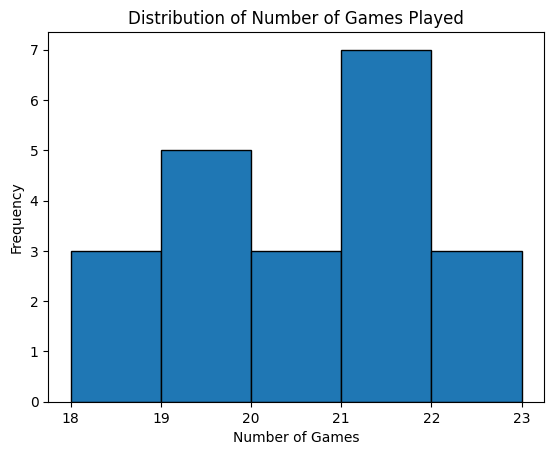

In [284]:
import matplotlib.pyplot as plt

# Plot the histogram with integer bins
plt.hist(merged_df['appearance'], bins=range(min(merged_df['appearance']), max(merged_df['appearance']) + 2), edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Games')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Games Played')

plt.show()


In [285]:
#############
# Second
###########

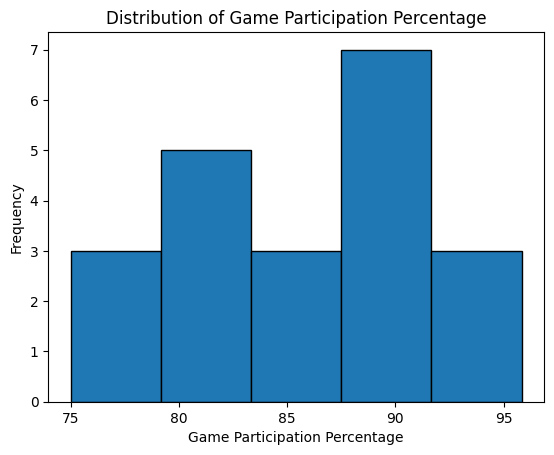

In [286]:


# Calculate the frequency of each percentage value
percentage_counts = merged_df['percentage'].value_counts().sort_index()

x = percentage_counts.index
y = percentage_counts.values

width = x[1] - x[0]

plt.bar(x, y, width=width, align='edge', edgecolor='black')


plt.xlabel('Game Participation Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Game Participation Percentage')

plt.show()


In [287]:
#############
# Third
###########

In [288]:


# Merge the dataframes based on player_id and id columns
merged_df = pd.merge(dfs['players_season'], dfs['players'], left_on='player_id', right_on='id')

# Select the desired columns
merged_df = merged_df[['name','player_id', 'season_id','goals', 'current_value','position']]

# Sort the seasons dataframe by end_date in descending order
sorted_seasons = dfs['seasons'].sort_values(by='end_date', ascending=False)

# Get the ID of the latest season
latest_season_id = sorted_seasons.iloc[0]['id']

merged_df = merged_df[merged_df['season_id'] == latest_season_id]


In [289]:
merged_df

,name,player_id,season_id,goals,current_value,position
0,ENYEY,1,1,2,82032.0,Goalkeeper
1,ENYEY,1,1,2,82032.0,Goalkeeper
2,LIRGC,2,1,15,62513.0,Centre-Back
4,EMKFJ,3,1,6,85781.0,Centre-Back
6,MWEPR,4,1,7,30613.0,Centre-Back
8,ZQAFL,5,1,23,94374.0,Centre-Forward
10,FYKCP,6,1,30,96209.0,Centre-Forward
12,XFEQR,7,1,35,60889.0,Centre-Forward
14,THWNW,8,1,1,24514.0,Goalkeeper
16,QDRWC,9,1,10,70513.0,Centre-Back


In [290]:
from scipy import stats


In [ ]:
#############
# Forth
###########

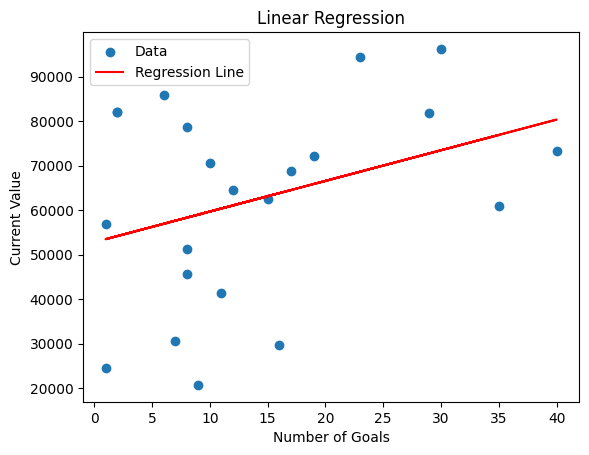

In [191]:


X = merged_df['goals']  
y = merged_df['current_value']  

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)


plt.scatter(X, y, label='Data')
plt.plot(X, intercept + slope * X, color='red', label='Regression Line')


plt.xlabel('Number of Goals')
plt.ylabel('Current Value')
plt.title('Linear Regression')


plt.legend()

plt.show()


In [192]:
#should change the conditon with the real data
merged_df_attack = merged_df[merged_df['position'] == 'Centre-Forward']

In [193]:
merged_df_attack

,name,player_id,season_id,goals,current_value,position
8,ZQAFL,5,1,23,94374.0,Centre-Forward
10,FYKCP,6,1,30,96209.0,Centre-Forward
12,XFEQR,7,1,35,60889.0,Centre-Forward
22,EZKMF,12,1,8,78618.0,Centre-Forward
24,BCTSC,13,1,8,51356.0,Centre-Forward
26,MMYKB,14,1,16,29641.0,Centre-Forward
36,NHYNL,19,1,40,73240.0,Centre-Forward
38,BZMZU,20,1,19,72105.0,Centre-Forward
40,FHDTY,21,1,29,81747.0,Centre-Forward


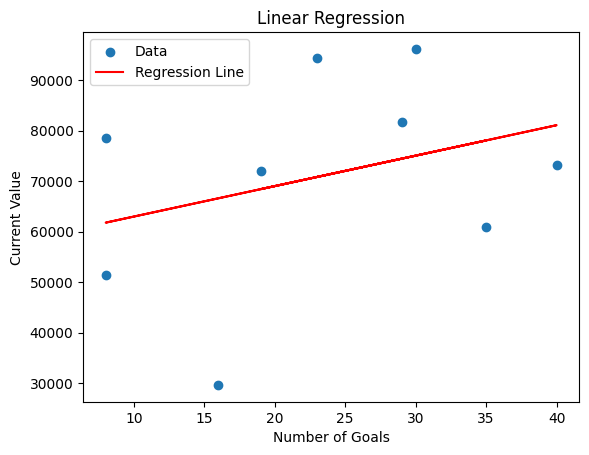

In [194]:

X = merged_df_attack['goals']  
y = merged_df_attack['current_value']  

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)


plt.scatter(X, y, label='Data')
plt.plot(X, intercept + slope * X, color='red', label='Regression Line')


plt.xlabel('Number of Goals')
plt.ylabel('Current Value')
plt.title('Linear Regression')


plt.legend()

plt.show()


In [195]:
merged_df

,name,player_id,season_id,goals,current_value,position
0,ENYEY,1,1,2,82032.0,Goalkeeper
1,ENYEY,1,1,2,82032.0,Goalkeeper
2,LIRGC,2,1,15,62513.0,Centre-Back
4,EMKFJ,3,1,6,85781.0,Centre-Back
6,MWEPR,4,1,7,30613.0,Centre-Back
8,ZQAFL,5,1,23,94374.0,Centre-Forward
10,FYKCP,6,1,30,96209.0,Centre-Forward
12,XFEQR,7,1,35,60889.0,Centre-Forward
14,THWNW,8,1,1,24514.0,Goalkeeper
16,QDRWC,9,1,10,70513.0,Centre-Back


In [196]:
#############
# Fifth
###########

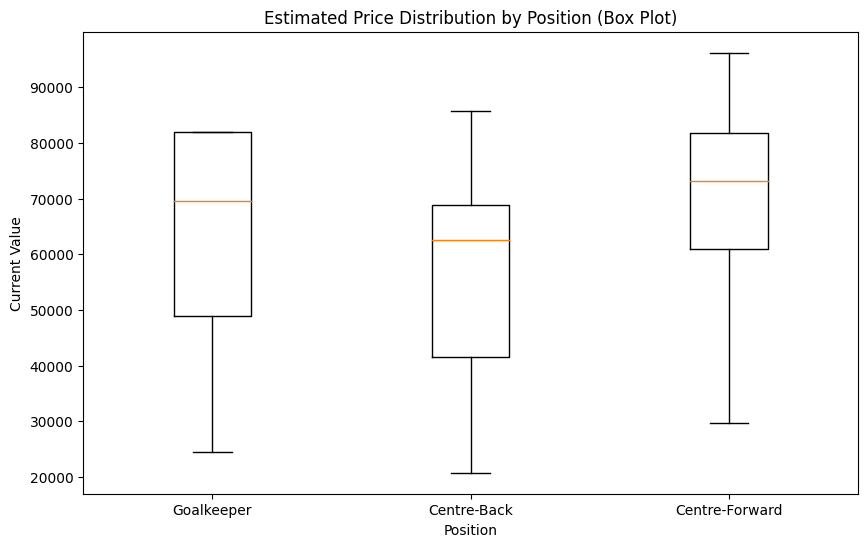

In [196]:
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df[merged_df['position'] == pos]['current_value'] for pos in merged_df['position'].unique()], labels=merged_df['position'].unique())
plt.xlabel('Position')
plt.ylabel('Current Value')
plt.title('Estimated Price Distribution by Position (Box Plot)')
plt.show()

In [198]:
dfs['competitions']
dfs['clubs_season']

,id,country_id,name,teams_number,market_value,players_numbers,avg_age,foreigners
0,1,1,league 1,20,9830000.0,350,24.0,200
1,2,2,league 2,16,541645.0,520,29.0,100
2,3,3,league 3,18,4548460.0,960,28.0,153


In [218]:
merged_df = dfs['clubs_season'].merge(dfs['competitions'], left_on='competition_id', right_on='id')
filtered_df = merged_df[merged_df['season_id'] == latest_season_id]

# Calculate the sum of goals_scored for each league
goals_by_league = filtered_df.groupby('name')['goals_scored'].sum()

In [ ]:
#############
# Sixth
###########

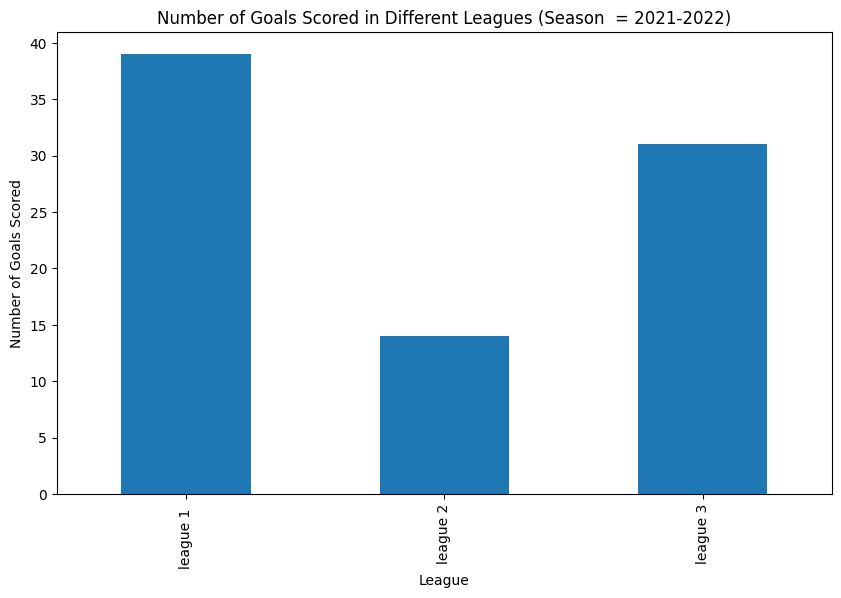

In [291]:
plt.figure(figsize=(10, 6))
goals_by_league.plot(kind='bar')
plt.xlabel('League')
plt.ylabel('Number of Goals Scored')
plt.title('Number of Goals Scored in Different Leagues (Season  = 2021-2022)')
plt.xticks(rotation=90)
plt.show()

,Id,player_id,origin_club_id,destination_club_id,season_id,market_value,fee
0,1,2,1,3,1,50000,23000
1,2,9,2,1,1,77000,23000
2,3,18,3,2,1,35000,87000


,id,name,country_id,foundation_date,value,stadium,squad_size,average_age,national_players,current_transfer_record,foreigners
0,1,club3,0,"Aug 12, 1982",877000.0,stadium 2,26,32.0,11,9810100.0,5
1,2,club4,2,"May 17, 1937",96100.0,stadium 2,21,24.9,9,1400000.0,9
2,3,club2,1,"Aug 1, 1990",102555.0,stadium 1,25,29.4,2,97025000.0,3
3,4,club1,1,"Aug 12, 1970",211000.0,stadium 1,21,27.1,10,88000000.0,10


In [292]:
#############
# Seventh
###########

In [293]:

transfer_merged = dfs['transfers'].merge(dfs['clubs'], left_on='destination_club_id', right_on='id')


sum_of_fee = transfer_merged.groupby(['season_id', 'name'])['fee'].sum()


sum_of_fee = sum_of_fee.reset_index()

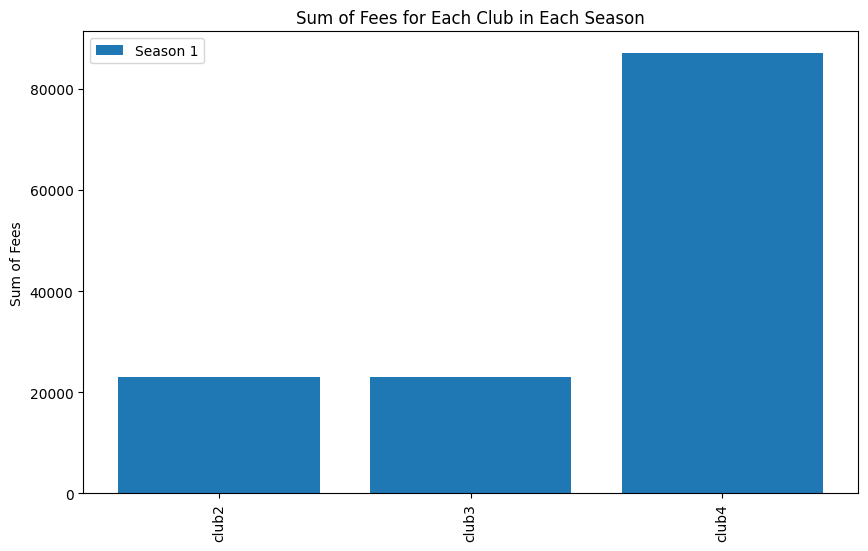

In [294]:
import matplotlib.pyplot as plt

# Merge the clubs DataFrame with the transfer DataFrame based on destination_club_id
transfer_merged = dfs['transfers'].merge(dfs['clubs'], left_on='destination_club_id', right_on='id')

# Group the data by season_id and destination club name, and calculate the sum of the fee
sum_of_fee = transfer_merged.groupby(['season_id', 'name'])['fee'].sum()

# Reset the index to convert the result into a DataFrame
sum_of_fee = sum_of_fee.reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
for season_id, group in sum_of_fee.groupby('season_id'):
    plt.bar(group['name'], group['fee'], label=f"Season {season_id}")

#plt.xlabel('Club')
plt.ylabel('Sum of Fees')
plt.title('Sum of Fees for Each Club in Each Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()
